## DTSA5510 Final Project

In this project, I will be using unsupervised learning techniques to classify cars from a given database. As a car enthusiast, I often find myself "window-shopping" through online databases such as "https://www.cargurus.com" and "https://www.cars.com" and search for cars according to my preference. I want to learn more about how these databases work, and whether I can use this database to perform supervised and unsupervised learning procedures.

I will be perform the following tasks:
 1. Perform data cleaning and derive a `price_category` categorical label from the car price information.
 2. Using unsupervised learning techniques, namely `K-Means` (https://en.wikipedia.org/wiki/K-means_clustering) and the `Non-negative matrix factorization (NMF)` (https://en.wikipedia.org/wiki/Non-negative_matrix_factorization), to predict the `price_category` labels.  
 3. Compare the classification of unsupervised learning with supervised learning techniques such as `Random Forest` (https://en.wikipedia.org/wiki/Random_forest) and `Logistic Regression` (https://en.wikipedia.org/wiki/Logistic_regression).
 
The data I will be using comes from a web-based ML data archive (Kaggle): 

Bektas, A. T. (2023, June). ` New York Cars`. Kaggle.
Retrived from https://www.kaggle.com/datasets/ahmettalhabektas/new-york-cars-big-data-2023, Dec. 11, 2023.
According to the description of the data, this database comes from www.cars.com, and includes 175490 entries of various cars.
The details of this dataset will be discussed in the following markup cells.

The goal of this project is to compare supervised and unsupervised learning techniques and understand the appropriateness of using them for categorical label clustering.


In [85]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.decomposition import NMF
import warnings

warnings.filterwarnings("ignore")

In [86]:
# using kaggle to download the dataset from Kaggle archive.
"""
        Bektas, A. T. (2023, June). ` New York Cars`. Kaggle.
        Retrived from https://www.kaggle.com/datasets/ahmettalhabektas/new-york-cars-big-data-2023, 
        Dec. 11, 2023.
"""
!kaggle datasets download -d ahmettalhabektas/new-york-cars-big-data-2023 --force
!unzip -o new-york-cars-big-data-2023.zip
!mkdir data
!mv New_York_cars.csv data/New_York_cars.csv
!mv Car_Rates.csv data/Car_Rates.csv

100%|██████████████████████████████████████| 4.82M/4.82M [00:01<00:00, 4.42MB/s]
100%|██████████████████████████████████████| 4.82M/4.82M [00:01<00:00, 4.39MB/s]
Archive:  new-york-cars-big-data-2023.zip
  inflating: Car_Rates.csv           
  inflating: New_York_cars.csv       
mkdir: data: File exists


#### Data Cleaning and EDA Analysis

In [87]:
# note that I will be mostly using the 'New_York_cars.csv' to perform the
# cluster analysis.
# 
data_all = pd.read_csv('data/New_York_cars.csv')

In [88]:
data_all

,new&used,name,money,Exterior color,Interior color,Drivetrain,MPG,Fuel type,Transmission,Engine,...,Safety,Seating,Accidents or damage,Clean title,1-owner vehicle,Personal use only,brand,Year,Model,currency
0,New,2023 Acura Integra Base,33095,Liquid Carbon Metallic,Ebony,Fwd,30–37,Gasoline,Automatic Cvt,1.5L I4 16V Gdi Dohc Turbo,...,Automatic Emergency BrakingBackup CameraBrak...,Leather Seats,NaN,NaN,NaN,NaN,Acura,2023,Integra Base,$
1,New,2023 Acura Mdx A-Spec,61745,Majestic Black Pearl,Ebony,Awd,19–25,Gasoline,10-Speed Automatic,3.5L V6 24V Gdi Sohc,...,Backup CameraBrake AssistLane Departure Warn...,Leather SeatsMemory SeatThird Row Seating,NaN,NaN,NaN,NaN,Acura,2023,Mdx A-Spec,$
2,New,2023 Acura Integra A-Spec Technology,38095,Majestic Black Pearl,Ebony,Fwd,26–36,Gasoline,6-Speed Manual,1.5L I4 16V Gdi Dohc Turbo,...,Backup CameraBrake AssistLane Departure Warn...,Leather SeatsMemory Seat,NaN,NaN,NaN,NaN,Acura,2023,Integra A-Spec Technology,$
3,New,2023 Acura Tlx A-Spec,47995,Majestic Black Pearl,Ebony,Fwd,22–30,Gasoline,10-Speed Automatic,2.0L I4 16V Gdi Dohc Turbo,...,Backup CameraBrake AssistLane Departure Warn...,Leather SeatsMemory Seat,NaN,NaN,NaN,NaN,Acura,2023,Tlx A-Spec,$
4,New,2023 Acura Tlx A-Spec,47995,Platinum White Pearl,Red,Fwd,22–30,Gasoline,10-Speed Automatic,2.0L I4 16V Gdi Dohc Turbo,...,Backup CameraBrake AssistLane Departure Warn...,Leather SeatsMemory Seat,NaN,NaN,NaN,NaN,Acura,2023,Tlx A-Spec,$
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175485,Used,2012 Volvo Xc60 T6 R-Design,12700,Ice White,Soft Beige / Off Black,Awd,17–23,Gasoline,6-Speed Automatic,3.0L I6 24V Mpfi Dohc Turbo,...,Brake AssistStability Control,Leather SeatsMemory Seat,At Least 1 Accident Or Damage Reported,NaN,No,Yes,Volvo,2012,Xc60 T6 R-Design,$
175486,Used,2012 Volvo S80 T6,10999,Black Stone,Off Black,Awd,18–26,Gasoline,6-Speed Automatic,3.0L I6 24V Mpfi Dohc Turbo,...,Brake AssistStability Control,Leather SeatsMemory Seat,None Reported,NaN,No,Yes,Volvo,2012,S80 T6,$
175487,Used,2012 Volvo S60 T5,7999,Black Sapphire Metallic,Soft Beige / Off Black,Fwd,20–30,Gasoline,6-Speed Automatic,2.5L I5 20V Mpfi Dohc Turbo,...,Brake AssistStability Control,Memory Seat,None Reported,Yes,Yes,Yes,Volvo,2012,S60 T5,$
175488,Used,2012 Volvo Xc60 3.2,18998,Ice White,Sandstone Beige,Fwd,19–25,Gasoline,6-Speed Automatic,3.2L I6 24V Mpfi Dohc,...,Brake AssistStability Control,Leather SeatsMemory Seat,None Reported,Yes,No,Yes,Volvo,2012,Xc60 3.2,$


In [89]:
data_all.columns

Index(['new&used', 'name', 'money', 'Exterior color', 'Interior color',
       'Drivetrain', 'MPG', 'Fuel type', 'Transmission', 'Engine', 'Mileage',
       'Convenience', 'Entertainment', 'Exterior', 'Safety', 'Seating',
       'Accidents or damage', 'Clean title', '1-owner vehicle',
       'Personal use only', 'brand', 'Year', 'Model', 'currency'],
      dtype='object')

Upon examining the information in the database, there are many columns that have NaNs or fillvalues, and many columns contain information that are less relevant to the classification procedure. Therefore using my own judgement, I decide to drop several of these columns:


In [90]:
data_all.drop([ 'MPG','Convenience', 'Entertainment', 'Exterior', 'Seating',
       'Accidents or damage', 'Clean title', '1-owner vehicle',
       'Personal use only', 'currency'],axis=1,inplace=True)

In [91]:
# check to see if the data still contains
data_all.isnull().sum()

new&used              0
name                  0
money                 0
Exterior color     1892
Interior color    14896
Drivetrain          556
Fuel type          1343
Transmission        764
Engine              332
Mileage              47
Safety             1942
brand                 0
Year                  0
Model                 0
dtype: int64

We can see that the data still contains some NaNs in several of its columns, e.g.. `Interior Color` has ~15K entries with NaN values.
Given that the original data has 175490 entries, I have decided to further drop rows with NaNs.

In [92]:
# For the engine column, we can also extract the engine displacement info:
data_all['displacement'] = data_all.Engine.str.extract(r'(\d+\.?\d*)').astype(float)

# For the purpose of clustering, I want to categorize the cars entries according to their price.
bins = [0, 15000, 25000, 35000,50000, 100000, 250000]    
labels = ["cheap", "intermediate", "average", "premium", "high-end","luxury"]    
data_all['price_category']= pd.cut(data_all.money, bins=bins, labels=labels)

In [93]:
data_all = data_all.dropna()

In [98]:
data_all.isnull().mean()

new&used          0.0
name              0.0
money             0.0
Exterior color    0.0
Interior color    0.0
Drivetrain        0.0
Fuel type         0.0
Transmission      0.0
Engine            0.0
Mileage           0.0
Safety            0.0
brand             0.0
Year              0.0
Model             0.0
displacement      0.0
price_category    0.0
dtype: float64

In [99]:
data_all.info()

<class 'pandas.core.frame.DataFrame'>
Index: 156798 entries, 0 to 175489
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype   
---  ------          --------------   -----   
 0   new&used        156798 non-null  object  
 1   name            156798 non-null  object  
 2   money           156798 non-null  int64   
 3   Exterior color  156798 non-null  object  
 4   Interior color  156798 non-null  object  
 5   Drivetrain      156798 non-null  object  
 6   Fuel type       156798 non-null  object  
 7   Transmission    156798 non-null  object  
 8   Engine          156798 non-null  object  
 9   Mileage         156798 non-null  float64 
 10  Safety          156798 non-null  object  
 11  brand           156798 non-null  object  
 12  Year            156798 non-null  int64   
 13  Model           156798 non-null  object  
 14  displacement    156798 non-null  float64 
 15  price_category  156798 non-null  category
dtypes: category(1), float64(2), int64(2), objec

After dropping NaNs, we are left with 156798 entries of various cars.

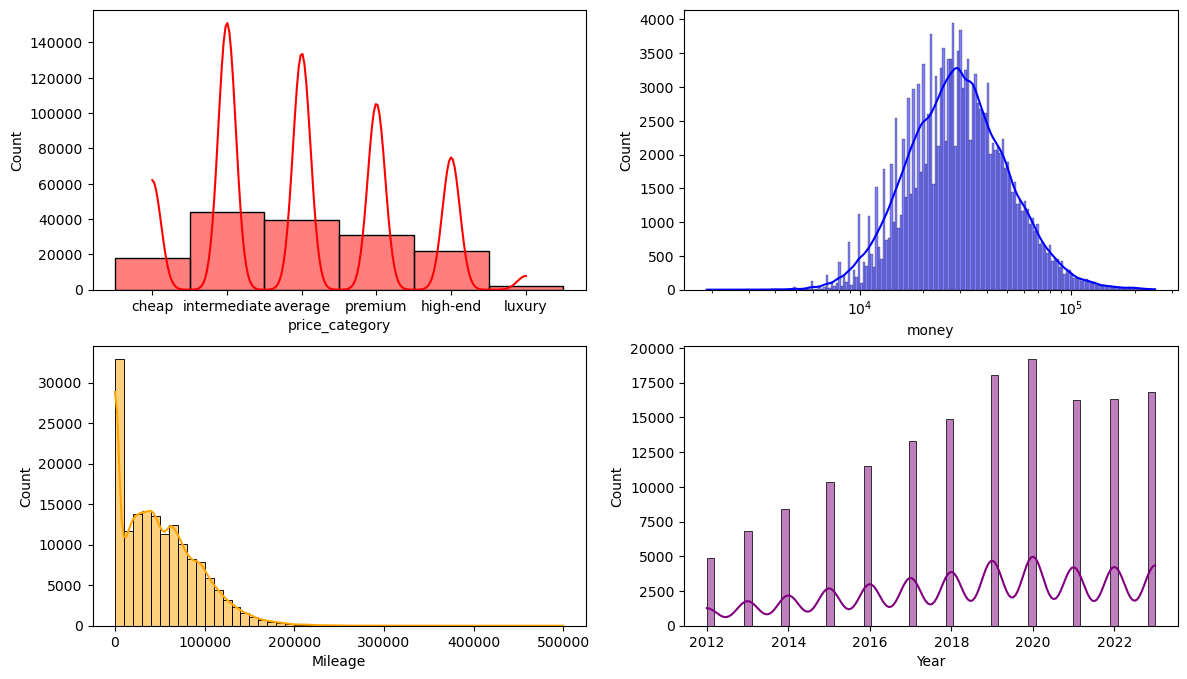

In [95]:
#define dimensions of subplots (rows, columns)
fig, axes = plt.subplots(2, 2,figsize=(14,8))
plt0 = sns.histplot(data_all['price_category'],kde = True, color='red', ax=axes[0,0])
plt1 = sns.histplot(data_all['money'],kde = True, color='blue',log_scale = True , ax=axes[0,1])
plt2 = sns.histplot(data_all['Mileage'],kde = True, color='orange',bins=np.arange(0,500000,10000), kde_kws={'clip': (0.0, 500000)}, ax=axes[1,0])
plt3 = sns.histplot(data_all['Year'],kde = True, color='purple', ax=axes[1,1])


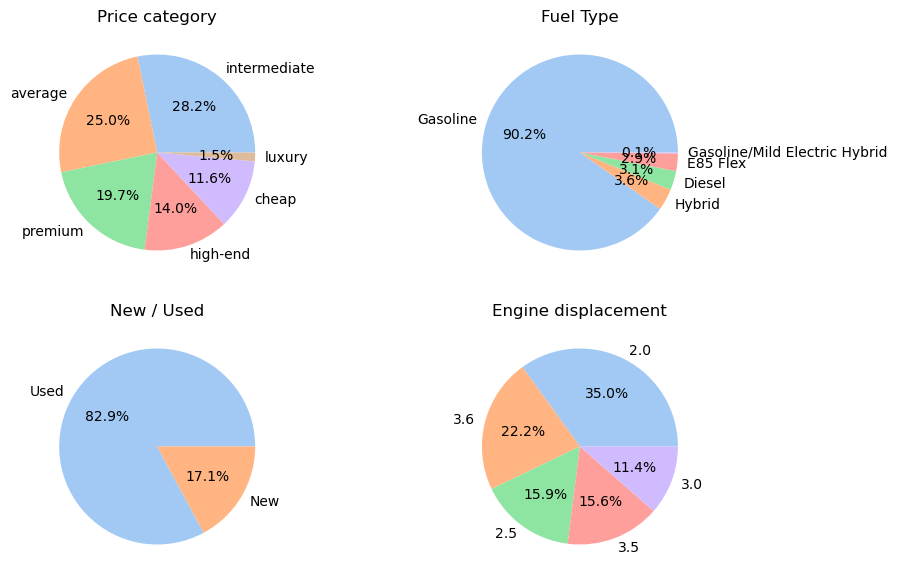

In [96]:
# Visualization of categorical data
fig, axs = plt.subplots(2, 2, figsize=(10,7))

axs[0, 0].pie(data_all['price_category'].value_counts(), \
        labels = data_all['price_category'].value_counts().index.tolist(),
        autopct='%1.1f%%', \
        radius=1, colors=sns.color_palette('pastel')[0:7],
        textprops={'fontsize': 10})
axs[0, 0].set_title('Price category')

axs[0, 1].pie(data_all['Fuel type'].value_counts()[0:5], \
        labels = data_all['Fuel type'].value_counts()[0:5].index.tolist(),
        autopct='%1.1f%%', \
        radius=1, colors=sns.color_palette('pastel')[0:6],
        textprops={'fontsize': 10})
axs[0, 1].set_title('Fuel Type')


axs[1,0].pie(data_all['new&used'].value_counts()[0:2], \
        labels=data_all['new&used'].value_counts()[0:2].index.tolist(), autopct='%1.1f%%', \
        radius=1, colors=sns.color_palette('pastel')[0:2],
        textprops={'fontsize': 10})
axs[1, 0].set_title('New / Used')

axs[1,1].pie(data_all['displacement'].value_counts().tolist()[0:5], \
        labels=data_all['displacement'].value_counts().index.tolist()[0:5], autopct='%1.1f%%', \
        radius=1, colors=sns.color_palette('pastel')[0:6],
        textprops={'fontsize': 10})
axs[1, 1].set_title('Engine displacement')
plt.show()


#### EDA Summary:
As seen above, the cleaning process removed all NaNs in the database, the derived `price_category` seems to have a positive correlation with Engine displacement. 
1. From both histogram and pie chart, the derived `price_category` have an overall shape of a gamma distribution, with `intermediate` labels being the most frequent labels in the database, followed by `average`, `premium`, and `high-end` cars. 
2. The majority of cars have low mileage (< 10K Miles), as observed from the 'Mileage' histogram.
3. THe majority of cars in this database are `Used` cars.
4. Most of the cars are relatively new (most cars are from Year 2018 and beyond).
5. Gasoline powered cars is the majority among all Fuel types.
6. The derived Engine `displacement` seems to correlate with the `price_category`.

#### Model training and Comparison

In [22]:
test_data = data_all.copy()

Logistic Regression Classification

In [23]:
features = test_data.drop(['price_category'],axis=1).columns.tolist()
target = 'price_category'

# Using labelencoder to encode categorical data from the data base.
encoder = LabelEncoder()
for feature in features:
    if test_data[feature].dtype == 'object':
        test_data[feature] = encoder.fit_transform(test_data[feature])

# Perform Training and Testing data split
X_train, X_test, y_train, y_test = train_test_split(test_data[features], test_data[target], test_size=0.2, random_state=42)

# Create a Logistic Regression Model using RandomizedSearchCV to
# test different combinations of hyperparameters
lg = LogisticRegression()
param_grid = {
    'penalty': ['l2'],
    'solver' : ['lbfgs'],
    'max_iter': [500,1000,2000]}

random_search = RandomizedSearchCV(estimator=lg,param_distributions=param_grid,
                scoring='accuracy', n_iter=3, cv=3, random_state=42)

random_search.fit(X_train, y_train)

print("Best Hyperparameters: ", random_search.best_params_)
print("Best Accuracy Score: ", random_search.best_score_)

Best Hyperparameters:  {'solver': 'lbfgs', 'penalty': 'l2', 'max_iter': 2000}
Best Accuracy Score:  0.9926816376096181


In [24]:
# Print out results from the final logistic regression model
final_lg = LogisticRegression(penalty='l2',solver='lbfgs', max_iter= 2000)
final_lg.fit(X_train, y_train)
y_pred = final_lg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Final Logistic Regression Model Test Accuracy:", accuracy)

Final Logistic Regression Model Test Accuracy: 0.9907206632653062


Random Forest Classification

In [25]:
# Again, using RandomizedSearchCV to perform permutations of various
# models with different hyperparameters for the random forest model.

rf = RandomForestClassifier()
param_grid = {
    'n_estimators': [100, 200, 300],
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 15, 25, 35, 45, 55],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [2, 4, 8],
    'max_features': ['sqrt'],
    'bootstrap': [True, False]
}

random_search = RandomizedSearchCV(estimator=rf,param_distributions=param_grid,
                scoring='accuracy', n_iter=3, cv=3, random_state=42)
random_search.fit(X_train, y_train)

print("Best Hyperparameters: ", random_search.best_params_)
print("Best Accuracy Score: ", random_search.best_score_)

Best Hyperparameters:  {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 45, 'criterion': 'gini', 'bootstrap': False}
Best Accuracy Score:  0.9995854520656926


In [26]:
# Print out results from the final Random Forest model
from sklearn.ensemble import RandomForestClassifier
final_rf = RandomForestClassifier(n_estimators=100, min_samples_split=5, min_samples_leaf=2, max_features='sqrt', max_depth=45,
                            criterion='gini', bootstrap=False)
final_rf.fit(X_train, y_train)
y_pred = final_rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Final Random Forest Model Test Accuracy:", accuracy)

Final Random Forest Model Test Accuracy: 0.9997130102040817


K-Means clustering

In [27]:
import itertools
# as learnt from class project, we need to run permutations 
# comparing the predicted labels and the actual labels.
def label_permute_compare(y_labels_df, y_predict):
    """
    y_labels_df: labels dataframe object
    yp: clustering label prediction output
    Returns permuted label order and accuracy. 
    """
# your code here
    y_true = np.array(y_labels_df).reshape(-1)
    uniq_labels = np.unique(y_true)
    perm = itertools.permutations(range(len(uniq_labels)))
    best_p, best_accuracy = None, 0
    for p in perm:
        p_label_map = {label: int_label for label, int_label in zip(uniq_labels, p)}
        p_labels = np.array([p_label_map[label] for label in y_true])
        accuracy = np.mean(p_labels == y_predict)
        if accuracy > best_accuracy:
            best_p = {num: l for num, l in zip(p, uniq_labels)}
            best_accuracy = accuracy
    return best_p, best_accuracy

In [55]:
# Setting up the K-Means model
modelkmeans = KMeans(n_clusters=6, max_iter=5000,random_state=0)
y = modelkmeans.fit_predict(X_train)
label_map_km, train_accuracy = label_permute_compare(y_train, y)
print("K-Means Training Accuracy:", train_accuracy)

K-Means Training Accuracy: 0.4293276359635836


In [61]:
modelkmeans = KMeans(n_clusters=6, max_iter=5000,random_state=0)
y = modelkmeans.fit_predict(X_test)
label_map_km, test_accuracy = label_permute_compare(y_test, y)
print("K-Means Test Accuracy:", test_accuracy)

K-Means Test Accuracy: 0.4214923469387755


Non-negative Matrix Factorization

In [47]:
nmf_model1 = NMF(n_components=6, 
                solver = 'mu',
                beta_loss = 'frobenius',
                l1_ratio = 0.9,
                random_state = 42)
nmf_model1.fit(X_train)

NMF(l1_ratio=0.9, n_components=6, random_state=42, solver='mu')

In [52]:
y_pred = np.array([np.argmax(i) for i in nmf_model1.transform(X_train)])
label_map_nmf, training_accuracy = label_permute_compare(y_train, y_pred)
training_accuracy

0.4399703439149221

In [53]:
y_pred = np.array([np.argmax(i) for i in nmf_model1.transform(X_test)])
label_map_nmf, testing_accuracy = label_permute_compare(y_test, y_pred)
testing_accuracy

0.439030612244898

In [62]:
# Examine the best permutation of label maps from NMF model
label_map_nmf

{0: 'average',
 2: 'cheap',
 5: 'high-end',
 1: 'intermediate',
 4: 'luxury',
 3: 'premium'}

In [63]:
# Examine the best permutation of label maps from K-Means model
label_map_km

{5: 'average',
 0: 'cheap',
 4: 'high-end',
 2: 'intermediate',
 3: 'luxury',
 1: 'premium'}

#### Discussion and Conclusion

This project is mostly an exploratory analysis trying to compare supervised learning techniques with unsupervised learning techniques. 


1. For the two selected machine learning techniques, through hyperparameter tuning I was able to achieve similar accuracy (>0.99) for both Logistic Regression and Random Forest. I would argue that the random forest performed slightly better than the logistic regression. THese accuracy scores were achieved by increasing the number of iterations in the hyperparameter tuning process.

2. For the two unsupervised learning technique (K-Means and NMF), the model does not seem to have any skill to predict the `price category` (both training and testing accuracy ~ 0.4 to 0.45). I experimented with different hyperparameters in setting up the K-means model and NMF, and also tried using PCA to perform dimension reduction on the training features but it doesn't seem to change the accuracy of the model by much. Increasing the number of iterations in the hyperparameter tuning process also didn't impact the accuracy. 

3. The poor performance in both unsupervised learning is expected, as the model does not know what to expect when performing the classification.  In other words, I think one important key takeaway from this experiment is that the task by design may not be appropriate enough for unsupervised learning, as the categorical labels (in this case, price range) are derived from the `money` feature in the original database, and most of the other features may not reflect the price range.
